In [10]:
import requests
import json
import time

API_KEY = "7f2b87717a96ed8e729a021d3703963a64f4f0590610efa2f3f0bb8a3480fd75"  # ← Ganti dengan API key kamu

# === Daftar lokasi yang mau di-loop ===
locations = [
    "@-6.4127127,105.6366857,9z",   # Banten
    "@-8.5028886,114.6232949,9.22z",
    "@-6.9494697,112.887142,10.97z",
    "@-6.9706583,113.3843077,10.97z",
    "@-6.9472124,113.8402023,10.97z",
]

query = "Tempat Wisata"
all_results = []  # untuk menyimpan hasil dari semua lokasi

# === Loop tiap lokasi ===
for ll in locations:
    print(f"🔍 Mencari tempat wisata di {ll} ...")

    params = {
        "engine": "google_maps",
        "ll": ll,
        "q": query,
        "api_key": API_KEY
    }

    response = requests.get("https://serpapi.com/search.json", params=params)

    if response.status_code == 200:
        data = response.json()

        # Ambil hasil lokal jika ada
        results = data.get("local_results", [])
        print(f"   ➕ Ditemukan {len(results)} tempat")

        all_results.extend(results)  # Gabungkan semua hasil ke satu list

        # jeda biar gak terlalu cepat (hindari limit)
        time.sleep(2)
    else:
        print("❌ Gagal mengambil data:", response.status_code, response.text)

# === Simpan hasil gabungan ke satu file JSON besar ===
with open("gabungan_tempat_wisata.json", "w", encoding="utf-8") as f:
    json.dump(all_results, f, indent=4, ensure_ascii=False)

print(f"✅ Total data digabung: {len(all_results)} tempat")
print("📁 Disimpan ke 'gabungan_tempat_wisata.json'")


🔍 Mencari tempat wisata di @-6.4127127,105.6366857,9z ...
   ➕ Ditemukan 20 tempat
🔍 Mencari tempat wisata di @-8.5028886,114.6232949,9.22z ...
   ➕ Ditemukan 20 tempat
🔍 Mencari tempat wisata di @-6.9494697,112.887142,10.97z ...
   ➕ Ditemukan 20 tempat
🔍 Mencari tempat wisata di @-6.9706583,113.3843077,10.97z ...
   ➕ Ditemukan 20 tempat
🔍 Mencari tempat wisata di @-6.9472124,113.8402023,10.97z ...
   ➕ Ditemukan 20 tempat
✅ Total data digabung: 100 tempat
📁 Disimpan ke 'gabungan_tempat_wisata.json'


In [ ]:
import json
import pandas as pd

# === 1. Buka file JSON hasil scraping SerpApi ===
with open("hasil_scraping_tempat_wisata.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# === 2. Pastikan struktur datanya list of places ===
# Jika data berada di bawah 'local_results', ambil itu
if isinstance(data, dict) and "local_results" in data:
    places = data["local_results"]
elif isinstance(data, list):
    places = data
else:
    places = [data]

# === 3. Filter kolom penting ===
filtered = []
for place in places:
    filtered.append({
        "title": place.get("title"),
        "rating": place.get("rating"),
        "reviews": place.get("reviews"),
        "address": place.get("address"),
        "description": place.get("description"),
        "latitude": place.get("gps_coordinates", {}).get("latitude"),
        "longitude": place.get("gps_coordinates", {}).get("longitude"),
        "operating_hours_sunday": place.get("operating_hours", {}).get("sunday"),
        "phone": place.get("phone"),
        "website": place.get("website")
    })

# === 4. Konversi ke DataFrame Pandas ===
df = pd.DataFrame(filtered)

# === 5. Simpan ke file CSV ===
df.to_csv("tempat_wisata_filtered.csv", index=False, encoding="utf-8-sig")

print("✅ Data berhasil disimpan ke 'tempat_wisata_filtered.csv'")
print(df.head())  # menampilkan 5 data pertama


✅ Data berhasil disimpan ke 'tempat_wisata_filtered.csv'
                        title  rating  reviews  \
0  Taman Langit Gunung Banyak     4.6     3166   
1  Polowijen Cultural Village     4.4      545   
2   Wisata Alam Sumber Podang     4.4      145   
3            Snow hill Ngetos     3.9      138   
4                 Goa Sentono     4.3      372   

                                             address  \
0  Jl. Gn. Banyak, Gunungsari, Bumiaji, Batu City...   
1  Jl. Cakalang, RT.3/RW.2, Polowijen, Blimbing, ...   
2  Sawah, Joho, Kec. Semen, Kabupaten Kediri, Jaw...   
3  dusun salam judeg No.desa, Area Persawahan, Bl...   
4  Mendenrejo Kradenan, Nglaren, Mendenrejo, Blor...   

                                         description  latitude   longitude  \
0  Landscaped sculpture garden with views. Popula... -7.854512  112.498050   
1  Heritage village w/hands-on activities. Cultur... -7.929319  112.643385   
2                                               None -7.826430  111.885

In [8]:
df

,title,rating,reviews,address,description,latitude,longitude,operating_hours_sunday,phone,website
0,Taman Langit Gunung Banyak,4.6,3166,"Jl. Gn. Banyak, Gunungsari, Bumiaji, Batu City...",Landscaped sculpture garden with views. Popula...,-7.854512,112.498050,7 am–12 am,+62 813-3318-3380,https://www.facebook.com/TamanLangitGunungBanyak/
1,Polowijen Cultural Village,4.4,545,"Jl. Cakalang, RT.3/RW.2, Polowijen, Blimbing, ...",Heritage village w/hands-on activities. Cultur...,-7.929319,112.643385,6 am–9:40 pm,+62 815-5181-303,https://kampungbudayapolowijen.blogspot.com/
2,Wisata Alam Sumber Podang,4.4,145,"Sawah, Joho, Kec. Semen, Kabupaten Kediri, Jaw...",None,-7.826430,111.885982,Open 24 hours,None,None
3,Snow hill Ngetos,3.9,138,"dusun salam judeg No.desa, Area Persawahan, Bl...",None,-7.765585,111.813868,Open 24 hours,+62 823-3473-6706,None
4,Goa Sentono,4.3,372,"Mendenrejo Kradenan, Nglaren, Mendenrejo, Blor...",None,-7.250172,111.456883,Open 24 hours,None,https://griyawahanaculture.company.site/
5,Sumber Umbulan Singosari,4.5,932,"Jl. Langlang No.3 RT.11, Langlang II, Langlang...",None,-7.895358,112.629004,Open 24 hours,None,None
6,Taman Wisata Selorejo,4.2,4480,"49F6+2CR, Sedawun, Pandansari, Ngantang, Malan...",None,-7.877398,112.361031,Open 24 hours,+62 341 522402,http://wisata-selorejo.blogspot.com/
7,PARANG HILL,4.0,299,"68HQ+JG6, Jarakan, Mategal, Kec. Parang, Kabup...",None,-7.770954,111.338779,Open 24 hours,+62 813-3515-8999,None
8,Puthuk Kreweng,4.3,425,"QPQ6+77P, Jl. Raya Gayam, Sogo, Mojodelik, Kec...",None,-7.211793,111.710689,9 am–9 pm,None,None
9,Ngopibareng Pintulangit | THE PINTULANGIT RESORT,4.4,8820,"Jl. Raya Tulang, Ledug, Kec. Prigen, Pasuruan,...",Highland views through a door frame. Quirky ob...,-7.713543,112.654147,9 am–9 pm,+62 812-3483-0202,https://instagram.com/ngopibarengpintulangit


In [13]:
import pandas as pd

with open("gabungan_tempat_wisata.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame([
    {
        "title": d.get("title"),
        "rating": d.get("rating"),
        "reviews": d.get("reviews"),
        "address": d.get("address"),
        "description": d.get("description"),
        "latitude": d.get("gps_coordinates", {}).get("latitude"),
        "longitude": d.get("gps_coordinates", {}).get("longitude"),
        "operating_hours": d.get("operating_hours", {}).get("sunday"),
        "phone": d.get("phone"),
        "website": d.get("website")
    }
    for d in data
])

df.to_csv("tempat_wisata_semua.csv", index=False, encoding="utf-8-sig")
print("✅ Data CSV gabungan berhasil disimpan!")


✅ Data CSV gabungan berhasil disimpan!


In [14]:
df

,title,rating,reviews,address,description,latitude,longitude,operating_hours,phone,website
0,Wisata Kota Tua Jakarta,4.6,24864,"Kawasan Kota Tua, Taman Fatahillah No.1 7, RT....",Old town area with colonial architecture. Hist...,-6.135069,106.813679,8 AM–9 PM,None,http://fb.com/wisatakotatua
1,Nangka Waterfall,4.3,7491,"8PMG+RX6, Sukajadi, Tamansari, Bogor Regency, ...",Dramatic waterfall with a modest pool. Scenic ...,-6.669066,106.726407,Open 24 hours,+62 858-8820-8799,None
2,Kampung Wisata Ciwaluh,4.5,396,"Kp wisata ciwaluh, Watesjaya, Cigombong, Bogor...",None,-6.764422,106.846269,Open 24 hours,+62 819-1191-7723,http://kampungwisataciwaluh.wordpress.com/
3,Taman Batu Gede Sayar,4.4,378,"V443+9JR, Sayar, Taktakan, Serang City, Banten...",None,-6.144002,106.104006,Open 24 hours,None,None
4,Taman Pandang Istana,4.5,2560,"Jalan Silang Monas Barat Laut, RT.5/RW.2, Gamb...",Open green space with benches. Urban plaza wit...,-6.172164,106.823383,Open 24 hours,None,None
...,...,...,...,...,...,...,...,...,...,...
135,Obyek Wisata Pacalan Paninggaran,4.3,126,"RHGQ+PV7, Besuki, Paninggaran, Kec. Paninggara...",None,-7.173179,109.588777,None,None,https://www.dzakironpedia.com/
136,Taman Dewi Sartika,4.6,615,"Jl. Wastukencana No.2, Babakan Ciamis, Kec. Su...",None,-6.913400,107.609515,Open 24 hours,None,None
137,Wisata Pinus Pananjung,4.5,179,"2FGJ+7MH, Dengkeng, Kidangpananjung, Kec. Cili...",None,-6.974315,107.481743,Open 24 hours,+62 823-1870-9319,None
138,Riung Gunung,4.5,13475,"7XXJ+37X, Puncak Rd, South Tugu, Cisarua, Bogo...",Tea plantation with expansive views. Hilltop t...,-6.702256,106.980736,None,None,None


In [15]:
with open("gabungan_tempat_wisata.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df_id = pd.DataFrame([
    {
        "title": d.get("title"),
        "data_id": d.get("data_id"),
        
    }
    for d in data
])

df_id

,title,data_id
0,Wisata Kota Tua Jakarta,0x2e69ec2a940017ed:0xdfce12d4a0938133
1,Nangka Waterfall,0x2e69cfd5ab533c53:0xf6427641a4bf1129
2,Kampung Wisata Ciwaluh,0x2e69cb13e98d08fb:0xa3e1681ae3b9fa85
3,Taman Batu Gede Sayar,0x2e418a647b89b7b1:0xe0101172d2968e85
4,Taman Pandang Istana,0x2e69f5d4058a4bbf:0xdf7aecafd6f46e32
...,...,...
135,Obyek Wisata Pacalan Paninggaran,0x2e701d9127330437:0x79b1399eb2205bf0
136,Taman Dewi Sartika,0x2e68e63a008d5815:0x70c839a012c11697
137,Wisata Pinus Pananjung,0x2e68ee2ad2aa5c7f:0xe5a0ed09d646e788
138,Riung Gunung,0x2e69b69f98787bdd:0x730f23f2e9499504


In [18]:
import requests
import pandas as pd
import time

API_KEY = "7f2b87717a96ed8e729a021d3703963a64f4f0590610efa2f3f0bb8a3480fd75"  # 🔑 ganti dengan API key kamu

all_reviews = []

for idx, row in df_id.iterrows():
    title = row.get("title")
    data_id = row.get("data_id")

    if pd.isna(data_id):
        continue

    print(f"\n📍 Mengambil review dari: {title}")

    next_page_token = None
    page = 1

    while True:
        params = {
            "engine": "google_maps_reviews",
            "data_id": data_id,
            "hl": "id",      # bahasa Indonesia
            "api_key": API_KEY
        }

        # Jika halaman selanjutnya, gunakan token
        if next_page_token:
            params["next_page_token"] = next_page_token
            params["num"] = 20


        response = requests.get("https://serpapi.com/search.json", params=params)

        if response.status_code != 200:
            print(f"❌ Gagal mengambil {title} (status {response.status_code})")
            break

        data = response.json()
        reviews = data.get("reviews", [])

        if not reviews:
            print("⚠️ Tidak ada review ditemukan.")
            break

        # Simpan ke list all_reviews
        for r in reviews:
            all_reviews.append({
                "title": title,
                "user_name": r.get("user", {}).get("name"),
                "rating": r.get("rating"),
                "date": r.get("date"),
                "review_text": r.get("snippet"),
                "likes": r.get("likes"),
                "data_id": data_id
            })

        print(f"   ➕ Halaman {page}: {len(reviews)} review")

        # Cek apakah masih ada halaman berikut
        next_page_token = data.get("serpapi_pagination", {}).get("next_page_token")

        # Batasi hanya 2 halaman per tempat (hemat kuota)
        if not next_page_token or page >= 2:
            break

        page += 1
        time.sleep(3)  # jeda antar request agar tidak kena rate limit

print(f"\n✅ Total review terkumpul: {len(all_reviews)}")

# === Buat DataFrame gabungan ===
df_reviews = pd.DataFrame(all_reviews)

# Simpan ke CSV
df_reviews.to_csv("gabungan_review_tempat_wisata.csv", index=False, encoding="utf-8-sig")

print("📁 File disimpan: gabungan_review_tempat_wisata.csv")



📍 Mengambil review dari: Wisata Kota Tua Jakarta
   ➕ Halaman 1: 8 review
   ➕ Halaman 2: 20 review

📍 Mengambil review dari: Nangka Waterfall
   ➕ Halaman 1: 8 review
   ➕ Halaman 2: 20 review

📍 Mengambil review dari: Kampung Wisata Ciwaluh
   ➕ Halaman 1: 8 review
   ➕ Halaman 2: 20 review

📍 Mengambil review dari: Taman Batu Gede Sayar
⚠️ Tidak ada review ditemukan.

📍 Mengambil review dari: Taman Pandang Istana
   ➕ Halaman 1: 8 review
   ➕ Halaman 2: 20 review

📍 Mengambil review dari: Karang Para
   ➕ Halaman 1: 8 review
   ➕ Halaman 2: 20 review

📍 Mengambil review dari: Taman Kemang Pratama
   ➕ Halaman 1: 8 review
   ➕ Halaman 2: 20 review

📍 Mengambil review dari: Telaga Batu
   ➕ Halaman 1: 8 review
   ➕ Halaman 2: 20 review

📍 Mengambil review dari: Kampung Bekelir
   ➕ Halaman 1: 8 review
   ➕ Halaman 2: 20 review

📍 Mengambil review dari: Monkey Forest Tourism Park
   ➕ Halaman 1: 8 review
   ➕ Halaman 2: 20 review

📍 Mengambil review dari: Cilember Waterfall
   ➕ Halam

In [19]:
df_reviews

,title,user_name,rating,date,review_text,likes,data_id
0,Wisata Kota Tua Jakarta,varra,3.0,seminggu lalu,Saya berkunjung ke Kota Tua sekitar pukul 1–3 ...,None,0x2e69ec2a940017ed:0xdfce12d4a0938133
1,Wisata Kota Tua Jakarta,Yosef Budiman,5.0,Diedit seminggu lalu,Saya mengunjungi kawasan kota tua hari ini. De...,None,0x2e69ec2a940017ed:0xdfce12d4a0938133
2,Wisata Kota Tua Jakarta,Seali Lismaryanti,5.0,2 bulan lalu,"Dateng sore, sejuk selalu ramai karna dari ber...",None,0x2e69ec2a940017ed:0xdfce12d4a0938133
3,Wisata Kota Tua Jakarta,arun karuniawan,4.0,sebulan lalu,"Kesini pagi hari jam 7an weekend. Masih sepi, ...",None,0x2e69ec2a940017ed:0xdfce12d4a0938133
4,Wisata Kota Tua Jakarta,Aprilia Wahyuningtyas,5.0,sebulan lalu,Salah satu kawasan wisata yang wajib dikunjung...,None,0x2e69ec2a940017ed:0xdfce12d4a0938133
...,...,...,...,...,...,...,...
2973,Havana Hills,Rizki Rachmawati,3.0,6 bulan lalu,"Tempatnya enak buat main sama anak, tp harus s...",None,0x2e656d009a44b057:0xf3e3c42e4ce6e7a5
2974,Havana Hills,Yanuar Aditya,5.0,Diedit 6 bulan lalu,"Banyak spot foto"" dan berbagai macam permainan...",None,0x2e656d009a44b057:0xf3e3c42e4ce6e7a5
2975,Havana Hills,Wahib Rosadi,4.0,2 tahun lalu,sebagai salah satu tempat wisata yang baru di ...,None,0x2e656d009a44b057:0xf3e3c42e4ce6e7a5
2976,Havana Hills,Faizal Mubarak,5.0,setahun lalu,"Tempat wisata yang sangat keren, lebih indah &...",None,0x2e656d009a44b057:0xf3e3c42e4ce6e7a5


In [22]:
df_clean = df_reviews.drop_duplicates(subset=["review_text"], keep="first")
df_clean

,title,user_name,rating,date,review_text,likes,data_id
0,Wisata Kota Tua Jakarta,varra,3.0,seminggu lalu,Saya berkunjung ke Kota Tua sekitar pukul 1–3 ...,None,0x2e69ec2a940017ed:0xdfce12d4a0938133
1,Wisata Kota Tua Jakarta,Yosef Budiman,5.0,Diedit seminggu lalu,Saya mengunjungi kawasan kota tua hari ini. De...,None,0x2e69ec2a940017ed:0xdfce12d4a0938133
2,Wisata Kota Tua Jakarta,Seali Lismaryanti,5.0,2 bulan lalu,"Dateng sore, sejuk selalu ramai karna dari ber...",None,0x2e69ec2a940017ed:0xdfce12d4a0938133
3,Wisata Kota Tua Jakarta,arun karuniawan,4.0,sebulan lalu,"Kesini pagi hari jam 7an weekend. Masih sepi, ...",None,0x2e69ec2a940017ed:0xdfce12d4a0938133
4,Wisata Kota Tua Jakarta,Aprilia Wahyuningtyas,5.0,sebulan lalu,Salah satu kawasan wisata yang wajib dikunjung...,None,0x2e69ec2a940017ed:0xdfce12d4a0938133
...,...,...,...,...,...,...,...
2973,Havana Hills,Rizki Rachmawati,3.0,6 bulan lalu,"Tempatnya enak buat main sama anak, tp harus s...",None,0x2e656d009a44b057:0xf3e3c42e4ce6e7a5
2974,Havana Hills,Yanuar Aditya,5.0,Diedit 6 bulan lalu,"Banyak spot foto"" dan berbagai macam permainan...",None,0x2e656d009a44b057:0xf3e3c42e4ce6e7a5
2975,Havana Hills,Wahib Rosadi,4.0,2 tahun lalu,sebagai salah satu tempat wisata yang baru di ...,None,0x2e656d009a44b057:0xf3e3c42e4ce6e7a5
2976,Havana Hills,Faizal Mubarak,5.0,setahun lalu,"Tempat wisata yang sangat keren, lebih indah &...",None,0x2e656d009a44b057:0xf3e3c42e4ce6e7a5


In [23]:
df_clean['user_name'].duplicated().sum()

np.int64(99)

In [ ]:
import pandas as pd

df_clean = df_clean[["user_name", "title", "rating"]]

# === 3️⃣ Hapus duplikat dan missing value ===
df_clean = df_clean.drop_duplicates(subset=["user_name", "title"])
df_clean = df_clean.dropna(subset=["user_name", "title", "rating"])

# (Opsional) pastikan rating berupa numerik
df_clean["rating"] = pd.to_numeric(df_clean["rating"], errors="coerce")
df_clean = df_clean.dropna(subset=["rating"])

# === 4️⃣ Buat matriks user–item ===
rating_matrix = df_clean.pivot_table(
    index="user_name",  # baris = pengguna
    columns="title",    # kolom = tempat wisata
    values="rating",    # isi = rating
    aggfunc="mean"      # kalau ada duplikat user-item
)

# === 5️⃣ Tampilkan hasil ===
print("📊 Bentuk matriks user–item:", rating_matrix.shape)
rating_matrix




📊 Bentuk matriks user–item: (2627, 99)


title,Air Terjun Kali Pedati,Air Terjun Toroan,Arema Blue Village,Avalokitesvara Buddhist Temple,Batu Tumpang,Bukit Asah Bali - Tempat Camping di Bali,Bukit Belong,Bukit Sewu Sambang,Bukit Tangkeban,Bungursari Lake Park,...,Wisata Hutan Pinus Batu Nyongclo,Wisata Kali Cemplong,Wisata Kampung Pasir,Wisata Kota Tua Jakarta,Wisata Mangrove Kedatim,Wisata Pantai Talang Siring Pamekasan,Wisata Pinus Pananjung,Wisata Puncak Vietnam,Wisata Religi Sunan Giri,Wisata Ziarah Pulau Cangkir
user_name,,,,,,,,,,,,,,,,,,,,,
0055_Elvina Aprelia,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01. Albert Steven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0100 - Aniq Ubaidillah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05. Anis Kumullia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124hmat Maulidi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhul. aimah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
{}SURYA{} {}GAMING{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ʚϊɞ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
import numpy as np

# Asumsikan rating_matrix = rating matrix pengguna vs tempat wisata (sudah disiapkan)
R = rating_matrix.values
num_users, num_items = R.shape

# Inisialisasi parameter
K = 10  # jumlah latent factors
P = np.random.rand(num_users, K)
Q = np.random.rand(num_items, K)

# Hyperparameter
alpha = 0.01  # learning rate
beta = 0.02   # regularisasi
epochs = 1000

# Training Matrix Factorization
for epoch in range(epochs):
    for i in range(num_users):
        for j in range(num_items):
            if R[i][j] > 0:  # hanya update jika ada rating
                eij = R[i][j] - np.dot(P[i, :], Q[j, :].T)
                for k in range(K):
                    P[i][k] += alpha * (2 * eij * Q[j][k] - beta * P[i][k])
                    Q[j][k] += alpha * (2 * eij * P[i][k] - beta * Q[j][k])
    
    # Optional: hitung error tiap 100 epoch
    if epoch % 100 == 0:
        error = 0
        for i in range(num_users):
            for j in range(num_items):
                if R[i][j] > 0:
                    error += pow(R[i][j] - np.dot(P[i, :], Q[j, :].T), 2)
        print(f"Epoch {epoch}, Error: {error:.4f}")

# Prediksi rating
predicted_ratings = np.dot(P, Q.T)

# 🔹 Clip hasil agar tetap dalam rentang 1–5
predicted_ratings = np.clip(predicted_ratings, 1, 5)

# 🔹 Simpan dalam bentuk DataFrame agar mudah dibaca
import pandas as pd
predicted_df = pd.DataFrame(predicted_ratings, 
                            index=rating_matrix.index, 
                            columns=rating_matrix.columns)

print("\n✅ Prediksi rating berhasil dihitung (sudah di-clip ke 1–5)!")
predicted_df


Epoch 0, Error: 3195.4889
Epoch 100, Error: 0.8535
Epoch 200, Error: 0.6978
Epoch 300, Error: 0.6311
Epoch 400, Error: 0.5813
Epoch 500, Error: 0.5424
Epoch 600, Error: 0.5113
Epoch 700, Error: 0.4862
Epoch 800, Error: 0.4655
Epoch 900, Error: 0.4481

✅ Prediksi rating berhasil dihitung (sudah di-clip ke 1–5)!


title,Air Terjun Kali Pedati,Air Terjun Toroan,Arema Blue Village,Avalokitesvara Buddhist Temple,Batu Tumpang,Bukit Asah Bali - Tempat Camping di Bali,Bukit Belong,Bukit Sewu Sambang,Bukit Tangkeban,Bungursari Lake Park,...,Wisata Hutan Pinus Batu Nyongclo,Wisata Kali Cemplong,Wisata Kampung Pasir,Wisata Kota Tua Jakarta,Wisata Mangrove Kedatim,Wisata Pantai Talang Siring Pamekasan,Wisata Pinus Pananjung,Wisata Puncak Vietnam,Wisata Religi Sunan Giri,Wisata Ziarah Pulau Cangkir
user_name,,,,,,,,,,,,,,,,,,,,,
0055_Elvina Aprelia,4.904335,4.999807,4.797124,5.000000,4.785045,4.753214,4.986880,5.000000,4.968328,4.707189,...,4.964465,4.749951,4.904135,5.000000,5.000000,4.300286,4.975085,5.000000,4.956056,4.523325
01. Albert Steven,4.756566,4.927203,4.740489,5.000000,4.603336,4.775747,4.894765,5.000000,4.861745,4.732431,...,4.954713,4.601262,4.772163,5.000000,5.000000,4.091037,4.821862,4.983796,4.790130,4.508609
0100 - Aniq Ubaidillah,5.000000,5.000000,5.000000,5.000000,4.943588,5.000000,4.977764,5.000000,5.000000,4.976903,...,5.000000,4.811690,4.753873,5.000000,5.000000,4.037794,5.000000,5.000000,5.000000,4.822332
05. Anis Kumullia,1.052734,1.000000,1.000000,1.000000,1.000000,1.023037,1.032605,1.007538,1.000000,1.000000,...,1.000000,1.000000,1.060743,1.071935,1.000000,1.055905,1.000000,1.036069,1.043685,1.000000
124hmat Maulidi,3.968256,3.786540,3.840620,4.070129,3.757925,3.900758,3.766210,4.085713,3.802419,3.825882,...,3.939228,3.408277,3.678170,3.945416,4.043684,3.130276,3.752107,3.876899,3.801643,3.558292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhul. aimah,2.786124,2.750011,2.629333,2.821600,2.784307,2.717786,2.723379,2.741342,2.785833,2.694139,...,2.788562,2.587130,2.682342,2.734314,2.842297,2.282021,2.753747,2.792846,2.755004,2.499461
{}SURYA{} {}GAMING{},4.656247,4.560246,4.558685,4.779551,4.612427,4.667492,4.789808,4.872264,4.805034,4.638283,...,4.787035,4.543810,4.658947,4.714012,4.826367,4.003657,4.777933,4.888769,4.806236,4.493018
ʚϊɞ,4.620379,4.631701,4.622239,4.803125,4.528573,4.673866,4.628123,4.988934,4.655810,4.566935,...,4.694742,4.438235,4.437833,4.680053,4.762551,3.771891,4.686304,4.759498,4.714754,4.384693


# EDA

In [34]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dua dataset
df_wisata = pd.read_csv("tempat_wisata_semua.csv")
df_review = pd.read_csv("gabungan_review_tempat_wisata.csv")

# Melihat struktur awal dataset
print("Dataset Tempat Wisata:")
display(df_wisata.info())
print("\nDataset Ulasan:")
display(df_review.info())

# Melihat beberapa data teratas
display(df_wisata.head())
display(df_review.head())


Dataset Tempat Wisata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            140 non-null    object 
 1   rating           140 non-null    float64
 2   reviews          140 non-null    int64  
 3   address          140 non-null    object 
 4   description      30 non-null     object 
 5   latitude         140 non-null    float64
 6   longitude        140 non-null    float64
 7   operating_hours  128 non-null    object 
 8   phone            46 non-null     object 
 9   website          30 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 11.1+ KB


None


Dataset Ulasan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        2978 non-null   object 
 1   user_name    2978 non-null   object 
 2   rating       2978 non-null   float64
 3   date         2978 non-null   object 
 4   review_text  2943 non-null   object 
 5   likes        0 non-null      float64
 6   data_id      2978 non-null   object 
dtypes: float64(2), object(5)
memory usage: 163.0+ KB


None

,title,rating,reviews,address,description,latitude,longitude,operating_hours,phone,website
0,Wisata Kota Tua Jakarta,4.6,24864,"Kawasan Kota Tua, Taman Fatahillah No.1 7, RT....",Old town area with colonial architecture. Hist...,-6.135069,106.813680,8 AM–9 PM,NaN,http://fb.com/wisatakotatua
1,Nangka Waterfall,4.3,7491,"8PMG+RX6, Sukajadi, Tamansari, Bogor Regency, ...",Dramatic waterfall with a modest pool. Scenic ...,-6.669066,106.726407,Open 24 hours,+62 858-8820-8799,NaN
2,Kampung Wisata Ciwaluh,4.5,396,"Kp wisata ciwaluh, Watesjaya, Cigombong, Bogor...",NaN,-6.764422,106.846269,Open 24 hours,+62 819-1191-7723,http://kampungwisataciwaluh.wordpress.com/
3,Taman Batu Gede Sayar,4.4,378,"V443+9JR, Sayar, Taktakan, Serang City, Banten...",NaN,-6.144002,106.104006,Open 24 hours,NaN,NaN
4,Taman Pandang Istana,4.5,2560,"Jalan Silang Monas Barat Laut, RT.5/RW.2, Gamb...",Open green space with benches. Urban plaza wit...,-6.172164,106.823383,Open 24 hours,NaN,NaN


,title,user_name,rating,date,review_text,likes,data_id
0,Wisata Kota Tua Jakarta,varra,3.0,seminggu lalu,Saya berkunjung ke Kota Tua sekitar pukul 1–3 ...,NaN,0x2e69ec2a940017ed:0xdfce12d4a0938133
1,Wisata Kota Tua Jakarta,Yosef Budiman,5.0,Diedit seminggu lalu,Saya mengunjungi kawasan kota tua hari ini. De...,NaN,0x2e69ec2a940017ed:0xdfce12d4a0938133
2,Wisata Kota Tua Jakarta,Seali Lismaryanti,5.0,2 bulan lalu,"Dateng sore, sejuk selalu ramai karna dari ber...",NaN,0x2e69ec2a940017ed:0xdfce12d4a0938133
3,Wisata Kota Tua Jakarta,arun karuniawan,4.0,sebulan lalu,"Kesini pagi hari jam 7an weekend. Masih sepi, ...",NaN,0x2e69ec2a940017ed:0xdfce12d4a0938133
4,Wisata Kota Tua Jakarta,Aprilia Wahyuningtyas,5.0,sebulan lalu,Salah satu kawasan wisata yang wajib dikunjung...,NaN,0x2e69ec2a940017ed:0xdfce12d4a0938133


,title,rating,reviews,address,description,latitude,longitude,operating_hours,phone,website
count,140,140.000000,140.000000,140,30,140.000000,140.000000,128,46,30
unique,130,NaN,NaN,130,29,NaN,NaN,27,42,28
top,Situ Rawa Gede (wisata alam),NaN,NaN,"9XCR+PGP, Sirnajaya, Sukamakmur, Bogor Regency...",Food stalls & deer encounters for kids. Small ...,NaN,NaN,Open 24 hours,+62 857-1666-1700,http://kwanim-kiong.org/
freq,2,NaN,NaN,2,2,NaN,NaN,92,2,2
mean,NaN,4.412857,1700.528571,NaN,NaN,-7.255091,111.712566,NaN,NaN,NaN
std,NaN,0.220478,3355.354779,NaN,NaN,0.675650,2.950918,NaN,NaN,NaN
min,NaN,3.600000,10.000000,NaN,NaN,-8.834537,105.192095,NaN,NaN,NaN
25%,NaN,4.300000,178.250000,NaN,NaN,-7.700614,108.855929,NaN,NaN,NaN
50%,NaN,4.450000,441.000000,NaN,NaN,-7.150859,112.791794,NaN,NaN,NaN
75%,NaN,4.525000,1445.250000,NaN,NaN,-6.927684,113.610301,NaN,NaN,NaN


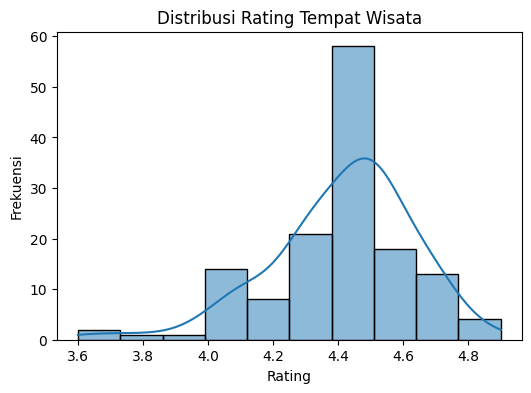

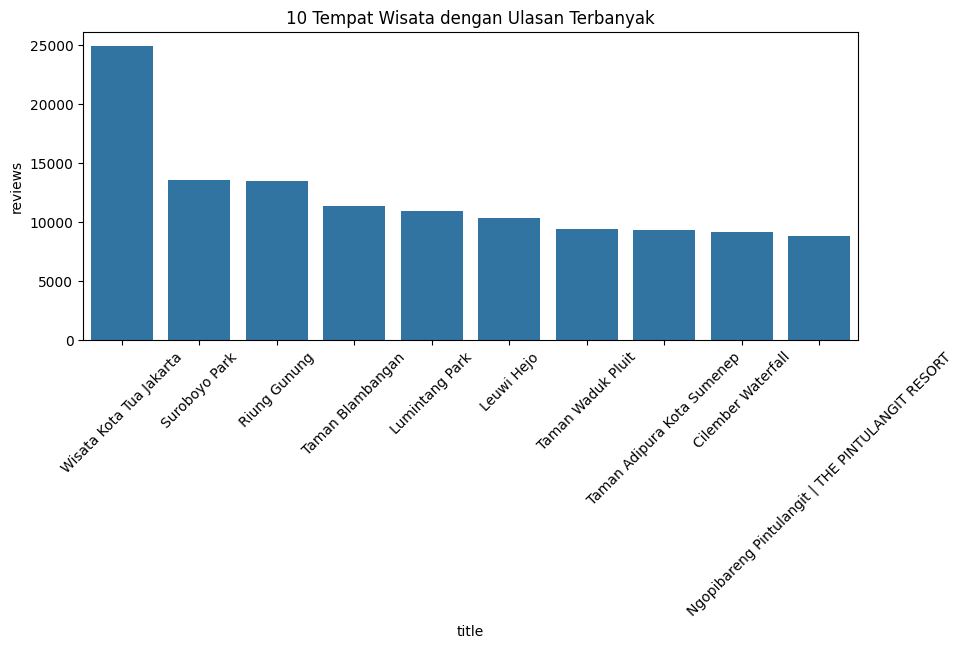

In [36]:
# Statistik deskriptif
display(df_wisata.describe(include='all'))

# Distribusi rating tempat wisata
plt.figure(figsize=(6,4))
sns.histplot(df_wisata['rating'], bins=10, kde=True)
plt.title('Distribusi Rating Tempat Wisata')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

# Jumlah ulasan per tempat wisata
plt.figure(figsize=(10,4))
sns.barplot(x='title', y='reviews', data=df_wisata.sort_values('reviews', ascending=False).head(10))
plt.title('10 Tempat Wisata dengan Ulasan Terbanyak')
plt.xticks(rotation=45)
plt.show()

C:\Users\Boinkk\AppData\Local\Temp\ipykernel_8780\2374682347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_review, palette='viridis')


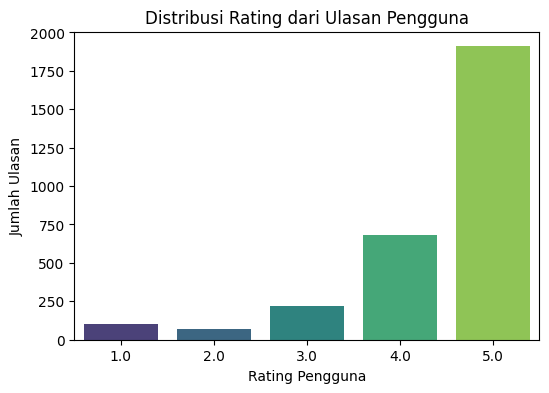

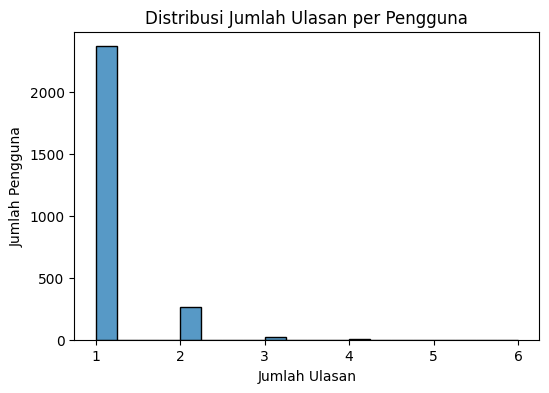

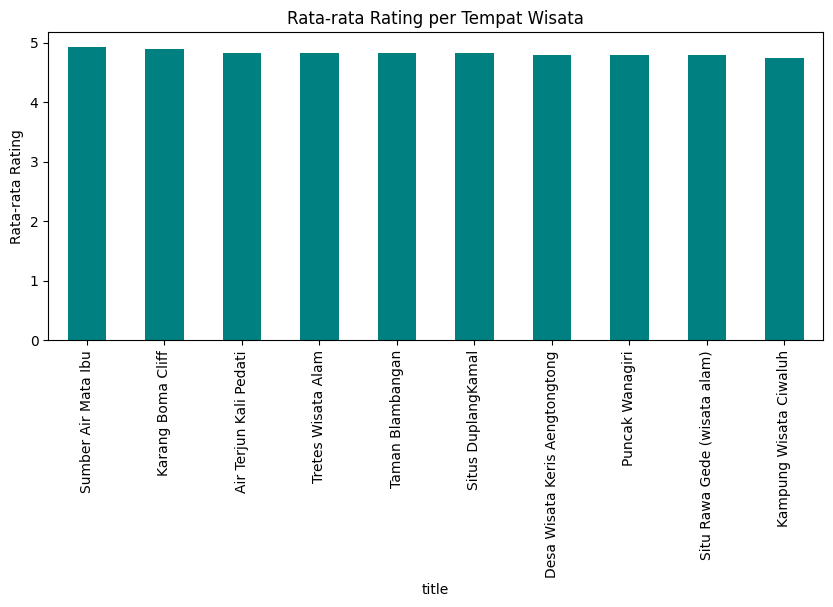

In [37]:
# Statistik rating pengguna
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df_review, palette='viridis')
plt.title('Distribusi Rating dari Ulasan Pengguna')
plt.xlabel('Rating Pengguna')
plt.ylabel('Jumlah Ulasan')
plt.show()

# Jumlah ulasan per pengguna (untuk deteksi aktivitas pengguna)
review_count = df_review['user_name'].value_counts()
plt.figure(figsize=(6,4))
sns.histplot(review_count, bins=20)
plt.title('Distribusi Jumlah Ulasan per Pengguna')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Jumlah Pengguna')
plt.show()

# Rata-rata rating per tempat wisata
avg_rating = df_review.groupby('title')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))
avg_rating.head(10).plot(kind='bar', color='teal')
plt.title('Rata-rata Rating per Tempat Wisata')
plt.ylabel('Rata-rata Rating')
plt.show()


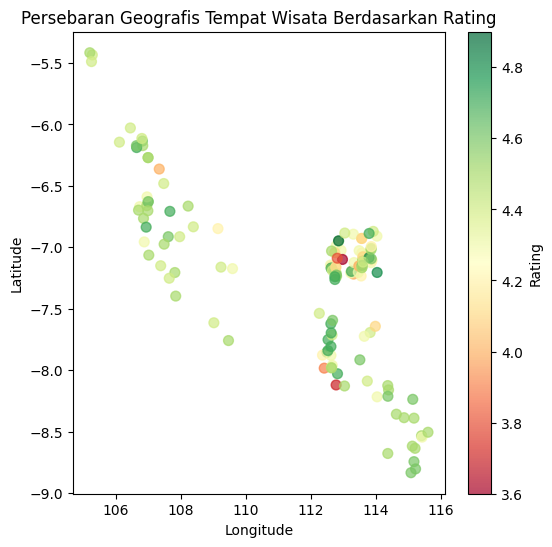

In [38]:
# Visualisasi persebaran geografis wisata
plt.figure(figsize=(6,6))
plt.scatter(df_wisata['longitude'], df_wisata['latitude'], 
            c=df_wisata['rating'], cmap='RdYlGn', s=50, alpha=0.7)
plt.colorbar(label='Rating')
plt.title('Persebaran Geografis Tempat Wisata Berdasarkan Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


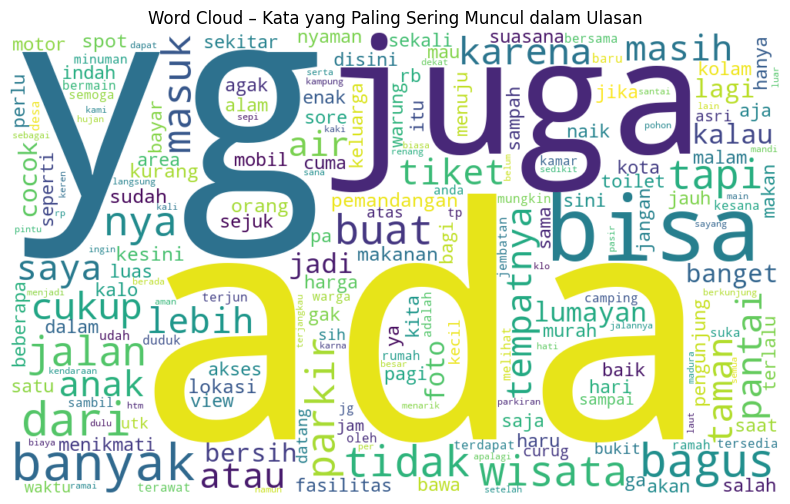

In [39]:
from wordcloud import WordCloud, STOPWORDS
import nltk
import re

df_review['review_text'] = df_review['review_text'].astype(str)

def clean_text(text):
    text = text.lower()  # huruf kecil semua
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # hapus simbol & angka
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    return text

df_review['clean_review'] = df_review['review_text'].apply(clean_text)

# Gabungkan semua teks ulasan
all_text = ' '.join(df_review['clean_review'])

# Tambahkan stopwords umum (kata yang tidak bermakna khusus)
stopwords = set(STOPWORDS)
stopwords.update(["tempat", "yang", "dan", "untuk", "di", "ke", "ini", "sangat", "dengan", "pada"])

# Buat word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    collocations=False
).generate(all_text)

# Tampilkan
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud – Kata yang Paling Sering Muncul dalam Ulasan")
plt.show()

count    2978.000000
mean       39.350235
std        42.606265
min         0.000000
25%        14.000000
50%        27.000000
75%        49.000000
max       505.000000
Name: word_count, dtype: float64


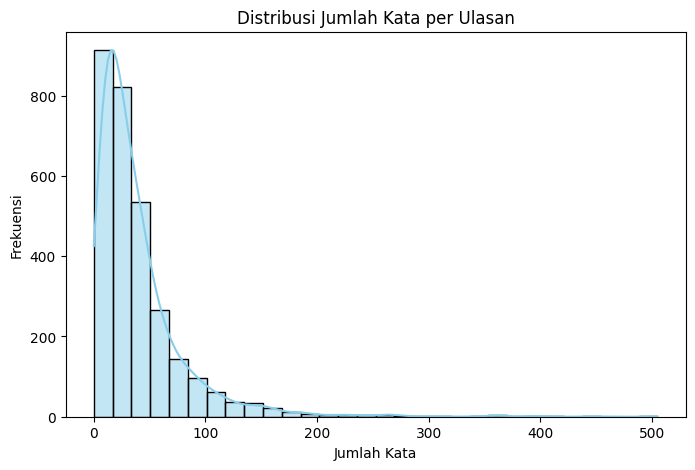

In [40]:
# Hitung jumlah kata per ulasan
df_review['word_count'] = df_review['clean_review'].apply(lambda x: len(x.split()))

# Statistik deskriptif
print(df_review['word_count'].describe())

# Visualisasi distribusi jumlah kata
plt.figure(figsize=(8,5))
sns.histplot(df_review['word_count'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Jumlah Kata per Ulasan")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Boinkk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


count    2978.000000
mean        2.975823
std         3.358456
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        40.000000
Name: sentence_count, dtype: float64


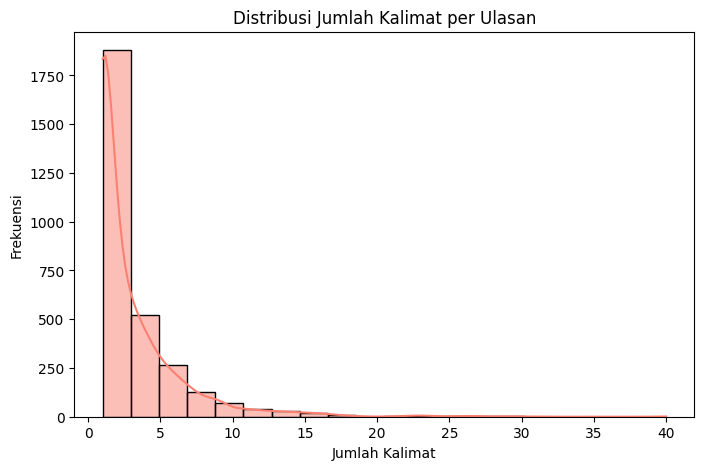

In [41]:
# Unduh tokenizer dari NLTK (jika belum)
nltk.download('punkt')

# Hitung jumlah kalimat per ulasan
df_review['sentence_count'] = df_review['review_text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Statistik deskriptif
print(df_review['sentence_count'].describe())

# Visualisasi distribusi jumlah kalimat
plt.figure(figsize=(8,5))
sns.histplot(df_review['sentence_count'], bins=20, kde=True, color='salmon')
plt.title("Distribusi Jumlah Kalimat per Ulasan")
plt.xlabel("Jumlah Kalimat")
plt.ylabel("Frekuensi")
plt.show()


# PREPROCESSING


## Menghapus fitur yang tidak diperlukan dan missing value

In [4]:
import pandas as pd

df_ulasan = pd.read_csv('data_ulasan.csv')

In [5]:
df_ulasan = df_ulasan.filter(items=['title', 'user_name', 'rating','review_text'])
df_ulasan


,title,user_name,rating,review_text
0,Wisata Kota Tua Jakarta,varra,3.0,Saya berkunjung ke Kota Tua sekitar pukul 1–3 ...
1,Wisata Kota Tua Jakarta,Yosef Budiman,5.0,Saya mengunjungi kawasan kota tua hari ini. De...
2,Wisata Kota Tua Jakarta,Seali Lismaryanti,5.0,"Dateng sore, sejuk selalu ramai karna dari ber..."
3,Wisata Kota Tua Jakarta,arun karuniawan,4.0,"Kesini pagi hari jam 7an weekend. Masih sepi, ..."
4,Wisata Kota Tua Jakarta,Aprilia Wahyuningtyas,5.0,Salah satu kawasan wisata yang wajib dikunjung...
...,...,...,...,...
2973,Havana Hills,Rizki Rachmawati,3.0,"Tempatnya enak buat main sama anak, tp harus s..."
2974,Havana Hills,Yanuar Aditya,5.0,"Banyak spot foto"" dan berbagai macam permainan..."
2975,Havana Hills,Wahib Rosadi,4.0,sebagai salah satu tempat wisata yang baru di ...
2976,Havana Hills,Faizal Mubarak,5.0,"Tempat wisata yang sangat keren, lebih indah &..."


### Deteksi Missing Value

In [6]:
print("\n1. Missing values per kolom:")
print(df_ulasan.isnull().sum())
print("\n2. Persentase missing values:")
print((df_ulasan.isnull().sum() / len(df_ulasan) * 100).round(2))
print(f"\n3. Total missing values: {df_ulasan.isnull().sum().sum()}")
print("\n4. Baris dengan missing values:")
display(df_ulasan[df_ulasan.isnull().any(axis=1)])


1. Missing values per kolom:
title           0
user_name       0
rating          0
review_text    35
dtype: int64

2. Persentase missing values:
title          0.00
user_name      0.00
rating         0.00
review_text    1.18
dtype: float64

3. Total missing values: 35

4. Baris dengan missing values:


,title,user_name,rating,review_text
1365,Wisata Dream Park Gagah,Azka Shidqia,4.0,NaN
1366,Wisata Dream Park Gagah,Miqdad Fahmi,5.0,NaN
1367,Wisata Dream Park Gagah,Ismail A,5.0,NaN
1368,Wisata Dream Park Gagah,Ficky Borendz07,5.0,NaN
1369,Wisata Dream Park Gagah,ROFIQI THOHIR,5.0,NaN
1370,Wisata Dream Park Gagah,A WAHID ABBAS,5.0,NaN
1371,Wisata Dream Park Gagah,Ach yanto,5.0,NaN
1701,Wisata Dream Park Gagah,Azka Shidqia,4.0,NaN
1702,Wisata Dream Park Gagah,Miqdad Fahmi,5.0,NaN
1703,Wisata Dream Park Gagah,Ismail A,5.0,NaN


In [7]:
df_ulasan = df_ulasan.dropna()
df_ulasan

,title,user_name,rating,review_text
0,Wisata Kota Tua Jakarta,varra,3.0,Saya berkunjung ke Kota Tua sekitar pukul 1–3 ...
1,Wisata Kota Tua Jakarta,Yosef Budiman,5.0,Saya mengunjungi kawasan kota tua hari ini. De...
2,Wisata Kota Tua Jakarta,Seali Lismaryanti,5.0,"Dateng sore, sejuk selalu ramai karna dari ber..."
3,Wisata Kota Tua Jakarta,arun karuniawan,4.0,"Kesini pagi hari jam 7an weekend. Masih sepi, ..."
4,Wisata Kota Tua Jakarta,Aprilia Wahyuningtyas,5.0,Salah satu kawasan wisata yang wajib dikunjung...
...,...,...,...,...
2973,Havana Hills,Rizki Rachmawati,3.0,"Tempatnya enak buat main sama anak, tp harus s..."
2974,Havana Hills,Yanuar Aditya,5.0,"Banyak spot foto"" dan berbagai macam permainan..."
2975,Havana Hills,Wahib Rosadi,4.0,sebagai salah satu tempat wisata yang baru di ...
2976,Havana Hills,Faizal Mubarak,5.0,"Tempat wisata yang sangat keren, lebih indah &..."


## Text Cleaning

In [8]:
import re
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
def clean_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to string
    text = str(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove emoji dan karakter khusus
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

df_ulasan['review_text_clean'] = df_ulasan['review_text'].apply(clean_text)

/tmp/ipykernel_115/3467159646.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ulasan['review_text_clean'] = df_ulasan['review_text'].apply(clean_text)


In [10]:
df_ulasan

,title,user_name,rating,review_text,review_text_clean
0,Wisata Kota Tua Jakarta,varra,3.0,Saya berkunjung ke Kota Tua sekitar pukul 1–3 ...,Saya berkunjung ke Kota Tua sekitar pukul din...
1,Wisata Kota Tua Jakarta,Yosef Budiman,5.0,Saya mengunjungi kawasan kota tua hari ini. De...,Saya mengunjungi kawasan kota tua hari ini Der...
2,Wisata Kota Tua Jakarta,Seali Lismaryanti,5.0,"Dateng sore, sejuk selalu ramai karna dari ber...",Dateng sore sejuk selalu ramai karna dari berb...
3,Wisata Kota Tua Jakarta,arun karuniawan,4.0,"Kesini pagi hari jam 7an weekend. Masih sepi, ...",Kesini pagi hari jam an weekend Masih sepi ena...
4,Wisata Kota Tua Jakarta,Aprilia Wahyuningtyas,5.0,Salah satu kawasan wisata yang wajib dikunjung...,Salah satu kawasan wisata yang wajib dikunjung...
...,...,...,...,...,...
2973,Havana Hills,Rizki Rachmawati,3.0,"Tempatnya enak buat main sama anak, tp harus s...",Tempatnya enak buat main sama anak tp harus si...
2974,Havana Hills,Yanuar Aditya,5.0,"Banyak spot foto"" dan berbagai macam permainan...",Banyak spot foto dan berbagai macam permainan ...
2975,Havana Hills,Wahib Rosadi,4.0,sebagai salah satu tempat wisata yang baru di ...,sebagai salah satu tempat wisata yang baru di ...
2976,Havana Hills,Faizal Mubarak,5.0,"Tempat wisata yang sangat keren, lebih indah &...",Tempat wisata yang sangat keren lebih indah me...


## Case Folding

In [11]:
def lower_text(text):
    return text.lower()

df_ulasan['review_text_lower'] = df_ulasan['review_text_clean'].apply(lower_text)
df_ulasan

/tmp/ipykernel_115/104579785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ulasan['review_text_lower'] = df_ulasan['review_text_clean'].apply(lower_text)


,title,user_name,rating,review_text,review_text_clean,review_text_lower
0,Wisata Kota Tua Jakarta,varra,3.0,Saya berkunjung ke Kota Tua sekitar pukul 1–3 ...,Saya berkunjung ke Kota Tua sekitar pukul din...,saya berkunjung ke kota tua sekitar pukul din...
1,Wisata Kota Tua Jakarta,Yosef Budiman,5.0,Saya mengunjungi kawasan kota tua hari ini. De...,Saya mengunjungi kawasan kota tua hari ini Der...,saya mengunjungi kawasan kota tua hari ini der...
2,Wisata Kota Tua Jakarta,Seali Lismaryanti,5.0,"Dateng sore, sejuk selalu ramai karna dari ber...",Dateng sore sejuk selalu ramai karna dari berb...,dateng sore sejuk selalu ramai karna dari berb...
3,Wisata Kota Tua Jakarta,arun karuniawan,4.0,"Kesini pagi hari jam 7an weekend. Masih sepi, ...",Kesini pagi hari jam an weekend Masih sepi ena...,kesini pagi hari jam an weekend masih sepi ena...
4,Wisata Kota Tua Jakarta,Aprilia Wahyuningtyas,5.0,Salah satu kawasan wisata yang wajib dikunjung...,Salah satu kawasan wisata yang wajib dikunjung...,salah satu kawasan wisata yang wajib dikunjung...
...,...,...,...,...,...,...
2973,Havana Hills,Rizki Rachmawati,3.0,"Tempatnya enak buat main sama anak, tp harus s...",Tempatnya enak buat main sama anak tp harus si...,tempatnya enak buat main sama anak tp harus si...
2974,Havana Hills,Yanuar Aditya,5.0,"Banyak spot foto"" dan berbagai macam permainan...",Banyak spot foto dan berbagai macam permainan ...,banyak spot foto dan berbagai macam permainan ...
2975,Havana Hills,Wahib Rosadi,4.0,sebagai salah satu tempat wisata yang baru di ...,sebagai salah satu tempat wisata yang baru di ...,sebagai salah satu tempat wisata yang baru di ...
2976,Havana Hills,Faizal Mubarak,5.0,"Tempat wisata yang sangat keren, lebih indah &...",Tempat wisata yang sangat keren lebih indah me...,tempat wisata yang sangat keren lebih indah me...


## Tokenization

In [2]:
!pip install transformers


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\Boinkk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import torch
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")


ModuleNotFoundError: No module named 'transformers'

In [37]:
# Tokenize seluruh dataset sekaligus
def batch_tokenize(df, text_column='review_text_lower', max_length=128):
    texts = df[text_column].fillna("").tolist()
    
    encoded = tokenizer.batch_encode_plus(
        texts,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    
    return encoded

# Contoh penggunaan
encoded_data = batch_tokenize(df_ulasan)
print("Shape input_ids:", encoded_data['input_ids'].shape)
print("Shape attention_mask:", encoded_data['attention_mask'].shape)

Shape input_ids: torch.Size([2943, 128])
Shape attention_mask: torch.Size([2943, 128])


In [40]:
def decode_tokens(input_ids):
    return tokenizer.convert_ids_to_tokens(input_ids, skip_special_tokens=False)

decoded_tokens = decode_tokens(encoded_data['input_ids'][0])
print("Decoded tokens:", decoded_tokens)


Decoded tokens: ['[CLS]', 'saya', 'berkunjung', 'ke', 'kota', 'tua', 'sekitar', 'pukul', 'dini', 'hari', 'secara', 'keseluruhan', 'tempatnya', 'kini', 'terasa', 'lebih', 'bersih', 'dan', 'nyaman', 'dibanding', 'terakhir', 'kali', 'saya', 'datang', 'sekitar', 'delapan', 'tahun', 'lalu', 'suasananya', 'juga', 'cukup', 'tenang', 'dan', 'aman', 'untuk', 'berjalanjalan', 'malam', 'namun', 'masih', 'ada', 'beberapa', 'hal', 'yang', 'perlu', 'diperhatikan', 'saya', 'masih', 'menemui', 'adanya', 'pungutan', 'liar', 'dari', 'parkir', 'tidak', 'resmi', 'beberapa', 'pedagang', 'yang', 'terlalu', 'memaksa', 'serta', 'penjual', 'dan', 'pengunjung', 'yang', 'masih', 'membuang', 'sampah', 'sembarangan', 'perubahan', 'ke', 'arah', 'yang', 'lebih', 'baik', 'memang', 'terlihat', 'tapi', 'pengawasan', 'dan', 'kedisiplinan', 'pengunjung', 'masih', 'perlu', 'ditingkatkan', 'agar', 'kota', 'tua', 'benarbenar', 'menjadi', 'area', 'wisata', 'yang', 'tertib', 'dan', 'nyaman', 'setiap', 'saat', '[SEP]', '[PAD]'

In [67]:
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p1")
def bert_mean_pooling(text):
    tokens = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=128
    )
    
    with torch.no_grad():
        outputs = model(**tokens)

    # ambil hidden states
    token_embeddings = outputs.last_hidden_state  # shape: [batch, seq_len, 768]
    attention_mask = tokens['attention_mask'].unsqueeze(-1)

    # mean pooling (mask-aware)
    summed = torch.sum(token_embeddings * attention_mask, dim=1)
    counts = torch.clamp(attention_mask.sum(dim=1), min=1e-9)

    mean_vec = summed / counts
    return mean_vec

df_ulasan["embedding"] = df_ulasan["review_text_lower"].apply(lambda x: bert_mean_pooling(x))
df_ulasan

2025-11-11 08:09:05.096528: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-11 08:09:05.109570: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762848545.125624     115 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762848545.133981     115 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762848545.146422     115 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

ValueError: Due to a serious vulnerability issue in `torch.load`, even with `weights_only=True`, we now require users to upgrade torch to at least v2.6 in order to use the function. This version restriction does not apply when loading files with safetensors.
See the vulnerability report here https://nvd.nist.gov/vuln/detail/CVE-2025-32434

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eb83c464-e91d-4ad1-a938-a9bede8a02e0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>